Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from keras import regularizers

In [5]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Collection and Processing

In [6]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/drive/My Drive/AI_MedProject/DiseasePrediction/dataset/heart.csv')

In [7]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [10]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [14]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [15]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [16]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [19]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

Epoch 1/600
7/7 [==============================] - 1s 46ms/step - loss: 1.5312 - accuracy: 0.5959 - val_loss: 1.4556 - val_accuracy: 0.7347 - lr: 0.0010
Epoch 2/600
7/7 [==============================] - 0s 11ms/step - loss: 1.4560 - accuracy: 0.6218 - val_loss: 1.3942 - val_accuracy: 0.7347 - lr: 0.0010
Epoch 3/600
7/7 [==============================] - 0s 13ms/step - loss: 1.3888 - accuracy: 0.6891 - val_loss: 1.3415 - val_accuracy: 0.7347 - lr: 0.0010
Epoch 4/600


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 0s 11ms/step - loss: 1.3114 - accuracy: 0.7150 - val_loss: 1.2955 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 5/600
7/7 [==============================] - 0s 11ms/step - loss: 1.3330 - accuracy: 0.6321 - val_loss: 1.2536 - val_accuracy: 0.7347 - lr: 0.0010
Epoch 6/600
7/7 [==============================] - 0s 14ms/step - loss: 1.2354 - accuracy: 0.7409 - val_loss: 1.2164 - val_accuracy: 0.7347 - lr: 0.0010
Epoch 7/600
7/7 [==============================] - 0s 11ms/step - loss: 1.2237 - accuracy: 0.7565 - val_loss: 1.1827 - val_accuracy: 0.7347 - lr: 0.0010
Epoch 8/600
7/7 [==============================] - 0s 11ms/step - loss: 1.1669 - accuracy: 0.7772 - val_loss: 1.1511 - val_accuracy: 0.7551 - lr: 0.0010
Epoch 9/600
7/7 [==============================] - 0s 13ms/step - loss: 1.1054 - accuracy: 0.7979 - val_loss: 1.1207 - val_accuracy: 0.7551 - lr: 0.0010
Epoch 10/600
7/7 [==============================] - 0s 11ms/step - loss: 1.0878 - accuracy: 0.

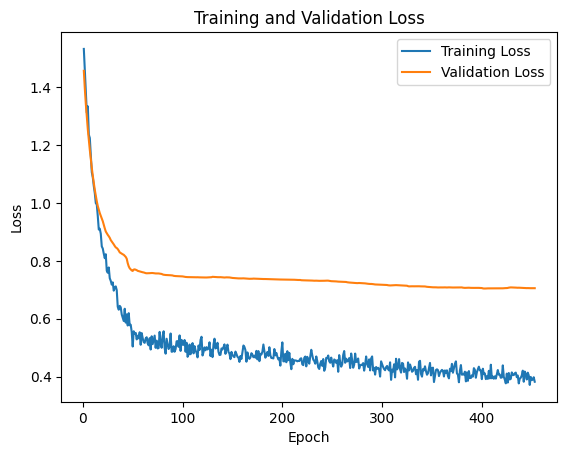

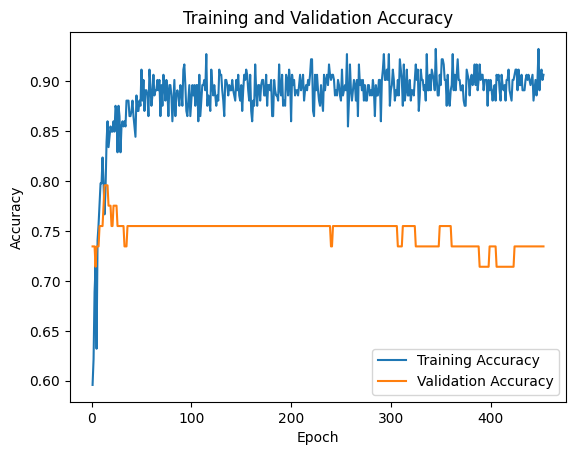

In [20]:
# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))
class LossRateCallback(Callback):
    def __init__(self):
        super().__init__()
        self.loss_rates = []

    def on_epoch_end(self, epoch, logs=None):
        loss = logs['loss']
        self.loss_rates.append(loss)

# Create an instance of the callback
loss_callback = LossRateCallback()

# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_layer)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=input_layer, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Define the ModelCheckpoint callback to save the weights of the best model
mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model and get the loss rates
history = model.fit(X_train_scaled, Y_train, epochs=600, batch_size=32, validation_split=0.2, verbose=1, callbacks=[loss_callback, early_stopping, reduce_lr, mcp_save])

# Get the training and validation metrics from the history object
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Get the number of epochs
num_epochs = len(training_loss)

# Plot the training and validation loss
plt.plot(range(1, num_epochs + 1), training_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(range(1, num_epochs + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Model Evaluation

Accuracy Score

In [21]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(Y_test, y_pred_binary)
auc_score = roc_auc_score(Y_test, y_pred)

2/2 [==============================] - 0s 5ms/step


In [22]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy:.8f}')
print(f'AUC Score: {auc_score:.8f}')

Accuracy: 0.81967213
AUC Score: 0.89069264


Building a Predictive System

In [24]:
import numpy as np
from tensorflow.keras.models import load_model

# Define the input data
input_data = np.array([[5, 166, 72, 19, 175, 25.8, 0.587, 51, 45, 3, 44, 12, 13]])

# Load the trained model
model = load_model('weight.hdf5')

# Perform feature scaling on the input data
input_data_scaled = scaler.transform(input_data)

# Make predictions
prediction = model.predict(input_data_scaled)

# Print the prediction
if prediction[0][0] < 0.5:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 208ms/step
The Person does not have a Heart Disease


Saving the trained model

In [25]:
model.save('/content/drive/My Drive/Colab Notebooks/AI_MedProject/DiseasePrediction/heart_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
